In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

# Configuração visual
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
df = pd.read_excel('c:/Users/marco/Downloads/Ampfy.xlsx')

In [27]:
df = pd.read_excel('/content/Ampfy.xlsx')
df.head()

,date,platform,campaign_name,ad_group_name,ad_name,cost,impressions,clicks,reactions,comments,saves,shares,views,views_25,views_50,views_75,views_complete
0,2024-10-31,meta-ads,amp_campaign_views_cpv_meta-ads,interesses,video_60s_produto-1_premium,15.18,25452,42,94,5,21,20,999,1076,728,591,291
1,2024-10-31,meta-ads,amp_campaign_views_cpv_meta-ads,rmkt,video_60s_produto-1_premium,10.07,9398,14,73,2,18,12,605,645,462,377,168
2,2024-10-31,meta-ads,amp_campaign_views_cpv_meta-ads,interesses,video_60s_produto-14_premium,43.90,61339,115,195,8,6,63,2796,3316,2081,1644,837
3,2024-10-31,meta-ads,amp_campaign_views_cpv_meta-ads,rmkt,video_60s_produto-14_premium,2.44,2726,8,12,1,2,2,150,174,111,88,48
4,2024-10-31,meta-ads,amp_campaign_views_cpv_meta-ads,interesses,video_45s_produto-13_basic,30.29,8266,14,100,0,6,25,1605,2477,1247,1070,705


In [35]:
# 2. CALCULAR MÉTRICAS

df['CTR'] = (df['clicks'] / df['impressions'] * 100).round(2)
df['VTR'] = (df['views_complete'] / df['views'] * 100).round(2)
df['CPV'] = (df['cost'] / df['views']).round(4)
df['CPC'] = (df['cost'] / df['clicks']).round(2)
df['CPM'] = (df['cost'] / df['impressions'] * 1000).round(2)
df['retenção_25'] = (df['views_25'] / df['views'] * 100).round(2)
df['retenção_50'] = (df['views_50'] / df['views'] * 100).round(2)
df['retenção_75'] = (df['views_75'] / df['views'] * 100).round(2)
df['taxa_engajamento'] = ((df['reactions'] + df['comments'] + df['saves']) / df['impressions'] * 100).round(2)


In [37]:
# 3. RESUMO EXECUTIVO


print("="*60)
print("RESUMO EXECUTIVO - OUTUBRO 2024")
print("="*60)

resumo = {
    'Investimento Total': f"R$ {df['cost'].sum():,.2f}",
    'Impressões': f"{df['impressions'].sum():,.0f}",
    'Clicks': f"{df['clicks'].sum():,.0f}",
    'Views': f"{df['views'].sum():,.0f}",
    'Views Completas': f"{df['views_complete'].sum():,.0f}",
    'Reactions': f"{df['reactions'].sum():,.0f}",
    'Comments': f"{df['comments'].sum():,.0f}",
    'Saves': f"{df['saves'].sum():,.0f}",
    'Shares': f"{df['shares'].sum():,.0f}",
    'CPM Médio': f"R$ {df['CPM'].mean():.2f}",
    'CPC Médio': f"R$ {df['CPC'].mean():.2f}",
    'CPV Médio': f"R$ {df['CPV'].mean():.4f}",
    'CTR Médio': f"{df['CTR'].mean():.2f}%",
    'VTR Médio': f"{df['VTR'].mean():.2f}%",
    'Taxa Engajamento': f"{df['taxa_engajamento'].mean():.2f}%"
}

for k, v in resumo.items():
    print(f"{k:<25}: {v}")

RESUMO EXECUTIVO - OUTUBRO 2024
Investimento Total       : R$ 72,000.00
Impressões               : 43,565,136
Clicks                   : 170,586
Views                    : 5,474,136
Views Completas          : 2,602,952
Reactions                : 312,927
Comments                 : 5,497
Saves                    : 46,043
Shares                   : 67,241
CPM Médio                : R$ 1.94
CPC Médio                : R$ inf
CPV Médio                : R$ 0.0141
CTR Médio                : 0.33%
VTR Médio                : 40.41%
Taxa Engajamento         : 0.90%


In [38]:
# 4. ANÁLISE POR DATA

print("\n" + "="*60)
print("TOP 5 DIAS COM MELHOR PERFORMANCE")
print("="*60)

performance_diaria = df.groupby('date').agg({
    'cost': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'views': 'sum',
    'views_complete': 'sum'
}).reset_index()

performance_diaria['VTR'] = (performance_diaria['views_complete'] / performance_diaria['views'] * 100).round(2)
performance_diaria['CTR'] = (performance_diaria['clicks'] / performance_diaria['impressions'] * 100).round(2)

top_dias = performance_diaria.nlargest(5, 'VTR')[['date', 'cost', 'views', 'VTR', 'CTR']]
print(top_dias.to_string(index=False))



TOP 5 DIAS COM MELHOR PERFORMANCE
      date   cost  views   VTR  CTR
2024-07-02 109.49  22850 77.09 0.54
2024-07-03 136.56  29754 76.65 0.56
2024-07-04 130.62  29049 75.84 0.53
2024-07-08 135.02  26200 75.31 0.47
2024-07-10 135.63  26900 75.00 0.46


In [39]:
# 5. ANÁLISE POR CRIATIVO

print("\n" + "="*60)
print("TOP 10 CRIATIVOS - MELHOR VTR")
print("="*60)

performance_criativo = df.groupby('ad_name').agg({
    'cost': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'views': 'sum',
    'views_complete': 'sum',
    'reactions': 'sum',
    'comments': 'sum',
    'shares': 'sum'
}).reset_index()

performance_criativo['VTR'] = (performance_criativo['views_complete'] / performance_criativo['views'] * 100).round(2)
performance_criativo['CTR'] = (performance_criativo['clicks'] / performance_criativo['impressions'] * 100).round(2)
performance_criativo['CPV'] = (performance_criativo['cost'] / performance_criativo['views']).round(4)
performance_criativo['engajamento_total'] = performance_criativo['reactions'] + performance_criativo['comments'] + performance_criativo['shares']

top_criativos = performance_criativo.nlargest(10, 'VTR')[['ad_name', 'views', 'VTR', 'CTR', 'CPV', 'engajamento_total']]
print(top_criativos.to_string(index=False))

print("\n" + "="*60)
print("BOTTOM 10 CRIATIVOS - PIOR VTR")
print("="*60)
bottom_criativos = performance_criativo.nsmallest(10, 'VTR')[['ad_name', 'views', 'VTR', 'CTR', 'CPV']]
print(bottom_criativos.to_string(index=False))



TOP 10 CRIATIVOS - MELHOR VTR
                    ad_name  views   VTR  CTR    CPV  engajamento_total
  video_45s_produto-7_basic 796572 72.49 0.47 0.0081              49895
 video_45s_produto-14_basic 317541 71.19 0.23 0.0096              15031
  video_45s_produto-2_basic 390456 64.26 0.34 0.0125              24290
 video_45s_produto-15_basic 251490 62.32 0.44 0.0179              18143
 video_45s_produto-11_basic 448719 58.52 0.58 0.0102              19924
 video_45s_produto-12_basic 403551 52.69 0.20 0.0167              47045
 video_45s_produto-13_basic 130939 45.55 0.25 0.0193               8728
  video_45s_produto-8_basic 477083 44.99 0.32 0.0103              32680
video_30s_produto-6_premium 132711 42.06 0.19 0.0235               3498
  video_60s_produto-7_basic 285018 41.81 0.40 0.0124              24180

BOTTOM 10 CRIATIVOS - PIOR VTR
                      ad_name  views   VTR  CTR    CPV
  video_45s_produto-6_premium 239892 13.81 0.20 0.0178
video_120s_produto-10_premium  7900

In [40]:
# 6. ANÁLISE POR SEGMENTO

print("\n" + "="*60)
print("PERFORMANCE POR SEGMENTO (AD_GROUP)")
print("="*60)

performance_segmento = df.groupby('ad_group_name').agg({
    'cost': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'views': 'sum',
    'views_complete': 'sum'
}).reset_index()

performance_segmento['VTR'] = (performance_segmento['views_complete'] / performance_segmento['views'] * 100).round(2)
performance_segmento['CTR'] = (performance_segmento['clicks'] / performance_segmento['impressions'] * 100).round(2)
performance_segmento['CPV'] = (performance_segmento['cost'] / performance_segmento['views']).round(4)

print(performance_segmento.to_string(index=False))


PERFORMANCE POR SEGMENTO (AD_GROUP)
ad_group_name     cost  impressions  clicks   views  views_complete   VTR  CTR    CPV
   interesses 57544.87     37189932  149699 4470286         2119357 47.41 0.40 0.0129
         rmkt 14455.13      6375204   20887 1003850          483595 48.17 0.33 0.0144



✅ Gráfico 1 salvo: grafico_1_evolucao_temporal.png


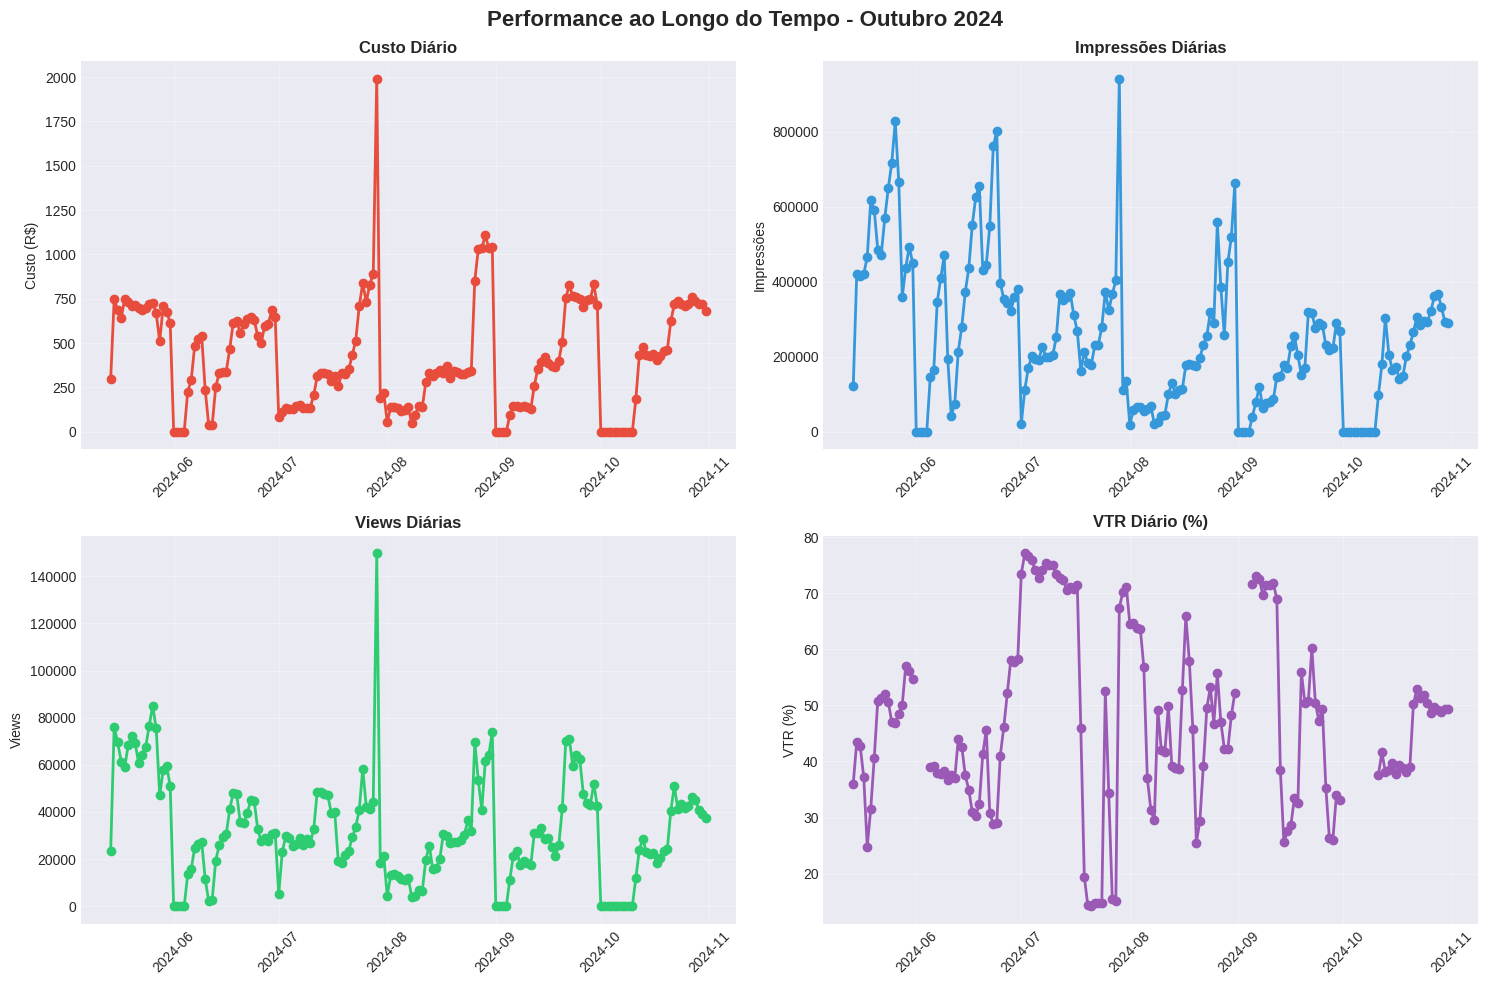

In [42]:
# Gráfico 1: Evolução temporal
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Performance ao Longo do Tempo - Outubro 2024', fontsize=16, fontweight='bold')

# Custo diário
axes[0, 0].plot(performance_diaria['date'], performance_diaria['cost'], marker='o', linewidth=2, color='#e74c3c')
axes[0, 0].set_title('Custo Diário', fontweight='bold')
axes[0, 0].set_ylabel('Custo (R$)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Impressões diárias
axes[0, 1].plot(performance_diaria['date'], performance_diaria['impressions'], marker='o', linewidth=2, color='#3498db')
axes[0, 1].set_title('Impressões Diárias', fontweight='bold')
axes[0, 1].set_ylabel('Impressões')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Views diárias
axes[1, 0].plot(performance_diaria['date'], performance_diaria['views'], marker='o', linewidth=2, color='#2ecc71')
axes[1, 0].set_title('Views Diárias', fontweight='bold')
axes[1, 0].set_ylabel('Views')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# VTR diário
axes[1, 1].plot(performance_diaria['date'], performance_diaria['VTR'], marker='o', linewidth=2, color='#9b59b6')
axes[1, 1].set_title('VTR Diário (%)', fontweight='bold')
axes[1, 1].set_ylabel('VTR (%)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('grafico_1_evolucao_temporal.png', dpi=300, bbox_inches='tight')
print("\n✅ Gráfico 1 salvo: grafico_1_evolucao_temporal.png")


✅ Gráfico 2 salvo: grafico_2_top_criativos.png
✅ Gráfico 3 salvo: grafico_3_funil_retencao.png
✅ Gráfico 4 salvo: grafico_4_segmentos.png


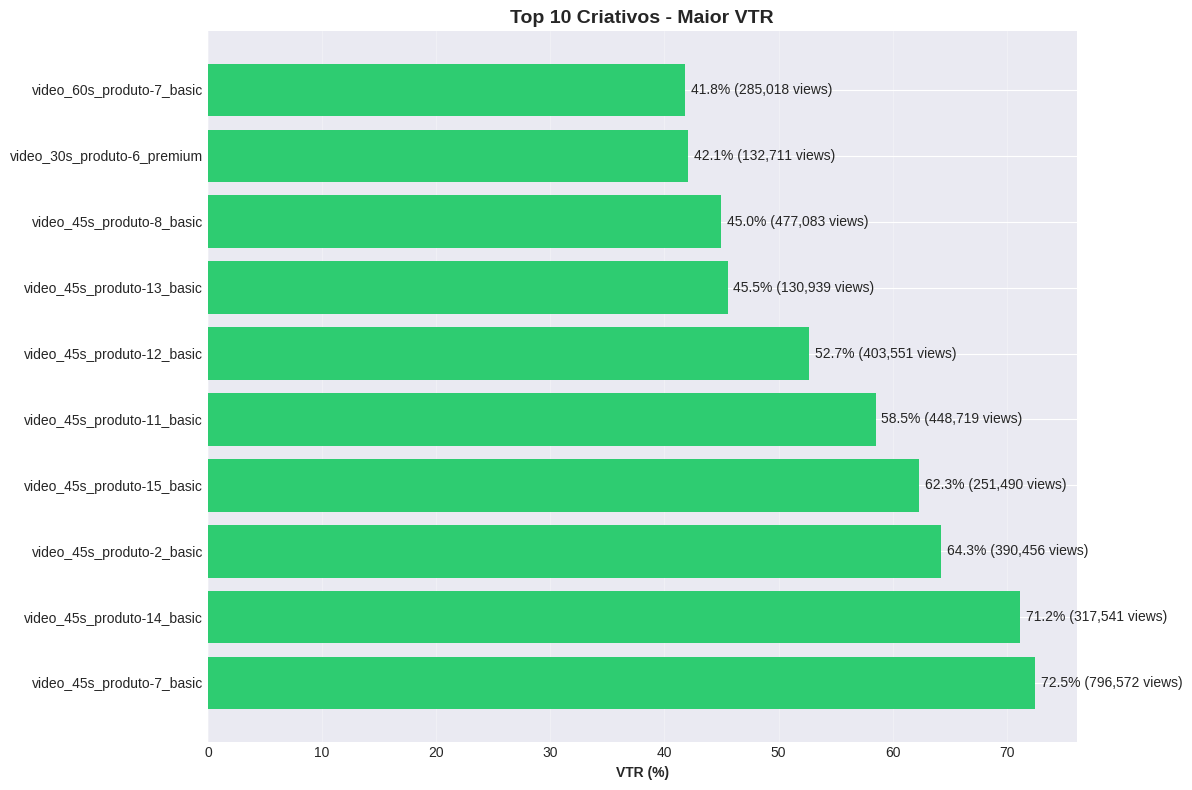

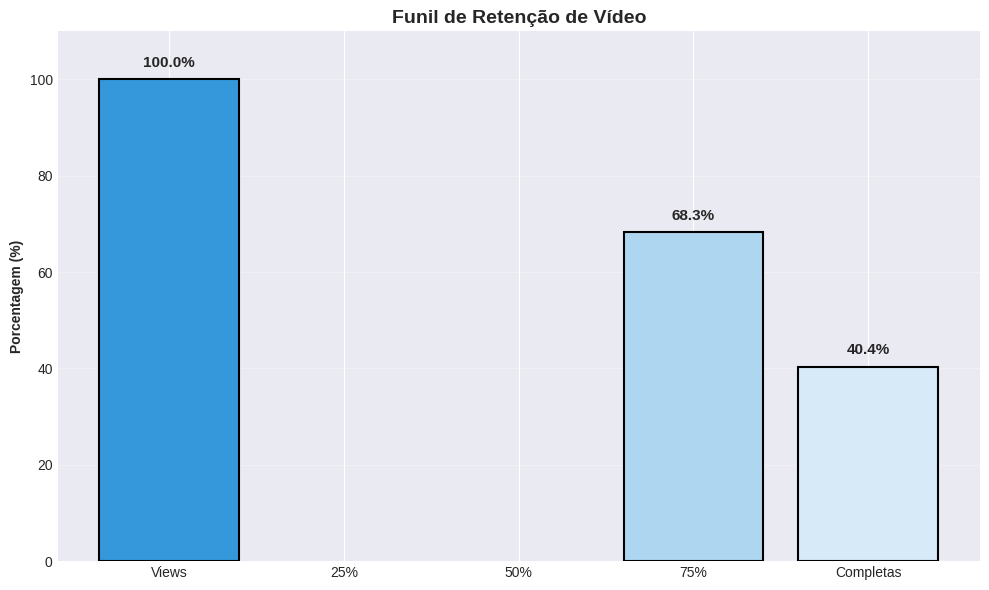

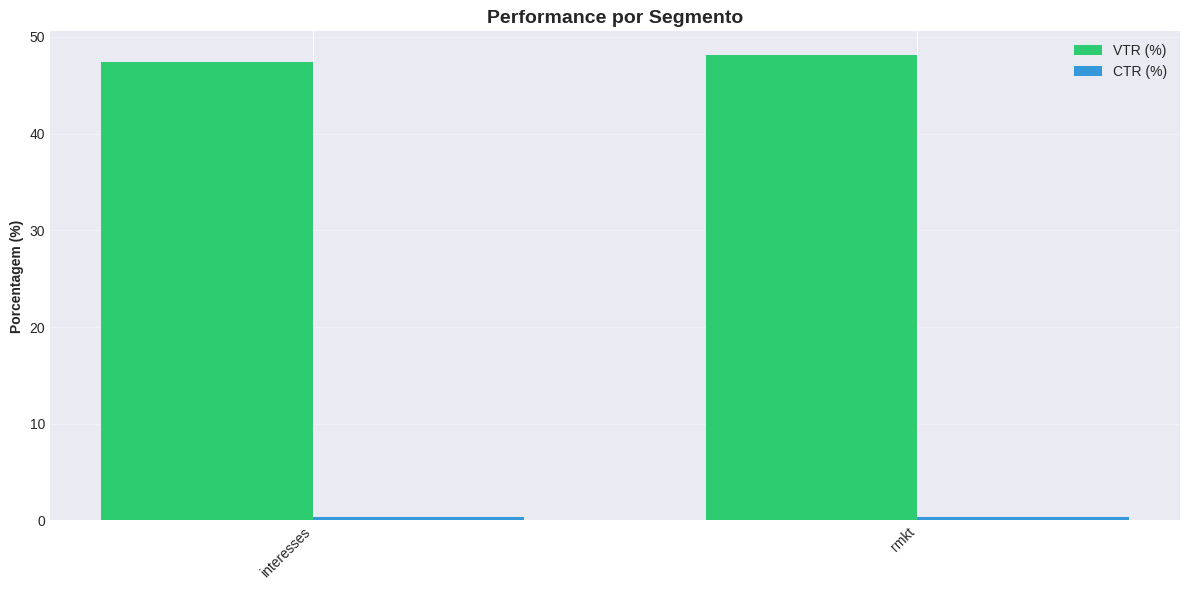

In [43]:
# Gráfico 2: Top 10 Criativos por VTR
fig, ax = plt.subplots(figsize=(12, 8))
top_10 = performance_criativo.nlargest(10, 'VTR')
bars = ax.barh(range(len(top_10)), top_10['VTR'], color='#2ecc71')
ax.set_yticks(range(len(top_10)))
ax.set_yticklabels([name[:30] + '...' if len(name) > 30 else name for name in top_10['ad_name']])
ax.set_xlabel('VTR (%)', fontweight='bold')
ax.set_title('Top 10 Criativos - Maior VTR', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

for i, (v, views) in enumerate(zip(top_10['VTR'], top_10['views'])):
    ax.text(v + 0.5, i, f'{v:.1f}% ({int(views):,} views)', va='center')

plt.tight_layout()
plt.savefig('grafico_2_top_criativos.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico 2 salvo: grafico_2_top_criativos.png")

# Gráfico 3: Funil de Retenção
fig, ax = plt.subplots(figsize=(10, 6))
retencao_media = {
    'Views': 100,
    '25%': df['retenção_25'].mean(),
    '50%': df['retenção_50'].mean(),
    '75%': df['retenção_75'].mean(),
    'Completas': df['VTR'].mean()
}

stages = list(retencao_media.keys())
values = list(retencao_media.values())
colors_funil = ['#3498db', '#5dade2', '#85c1e9', '#aed6f1', '#d6eaf8']

bars = ax.bar(stages, values, color=colors_funil, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Porcentagem (%)', fontweight='bold')
ax.set_title('Funil de Retenção de Vídeo', fontsize=14, fontweight='bold')
ax.set_ylim(0, 110)
ax.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{val:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('grafico_3_funil_retencao.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico 3 salvo: grafico_3_funil_retencao.png")

# Gráfico 4: Performance por Segmento
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(performance_segmento))
width = 0.35

bars1 = ax.bar(x - width/2, performance_segmento['VTR'], width, label='VTR (%)', color='#2ecc71')
bars2 = ax.bar(x + width/2, performance_segmento['CTR'], width, label='CTR (%)', color='#3498db')

ax.set_ylabel('Porcentagem (%)', fontweight='bold')
ax.set_title('Performance por Segmento', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([name[:20] for name in performance_segmento['ad_group_name']], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('grafico_4_segmentos.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico 4 salvo: grafico_4_segmentos.png")


In [44]:
# 8. EXPORTAR PARA EXCEL

with pd.ExcelWriter('analise_campanha_outubro.xlsx', engine='openpyxl') as writer:
    # Aba 1: Resumo
    pd.DataFrame([resumo]).T.to_excel(writer, sheet_name='Resumo', header=['Valor'])

    # Aba 2: Performance Diária
    performance_diaria.to_excel(writer, sheet_name='Performance Diária', index=False)

    # Aba 3: Performance por Criativo
    performance_criativo.sort_values('VTR', ascending=False).to_excel(writer, sheet_name='Criativos', index=False)

    # Aba 4: Performance por Segmento
    performance_segmento.to_excel(writer, sheet_name='Segmentos', index=False)

    # Aba 5: Dados Completos
    df.to_excel(writer, sheet_name='Dados Completos', index=False)

print("\n✅ Análise exportada: analise_campanha_outubro.xlsx")


✅ Análise exportada: analise_campanha_outubro.xlsx


In [46]:
# 9. INSIGHTS PRINCIPAIS
# =======================
print("\n" + "="*60)
print("🎯 PRINCIPAIS INSIGHTS")
print("="*60)

# Melhor criativo
melhor_criativo = performance_criativo.loc[performance_criativo['VTR'].idxmax()]
print(f"\n1. Melhor criativo (VTR): {melhor_criativo['ad_name']}")
print(f"   VTR: {melhor_criativo['VTR']:.2f}% | Views: {int(melhor_criativo['views']):,}")

# Pior criativo
pior_criativo = performance_criativo.loc[performance_criativo['VTR'].idxmin()]
print(f"\n2. Criativo com pior performance: {pior_criativo['ad_name']}")
print(f"   VTR: {pior_criativo['VTR']:.2f}% | Recomendação: PAUSAR")

# Retenção
print(f"\n3. Taxa de retenção:")
print(f"   - 25% do vídeo: {df['retenção_25'].mean():.1f}%")
print(f"   - 50% do vídeo: {df['retenção_50'].mean():.1f}%")
print(f"   - 75% do vídeo: {df['retenção_75'].mean():.1f}%")
print(f"   - Completo: {df['VTR'].mean():.1f}%")

# Melhor dia
melhor_dia = performance_diaria.loc[performance_diaria['VTR'].idxmax()]
print(f"\n4. Melhor dia da campanha: {melhor_dia['date'].strftime('%d/%m/%Y')}")
print(f"   VTR: {melhor_dia['VTR']:.2f}% | Views: {int(melhor_dia['views']):,}")

# Melhor segmento
melhor_segmento = performance_segmento.loc[performance_segmento['VTR'].idxmax()]
print(f"\n5. Melhor segmento: {melhor_segmento['ad_group_name']}")
print(f"   VTR: {melhor_segmento['VTR']:.2f}% | CPV: R$ {melhor_segmento['CPV']:.4f}")

print("\n" + "="*60)
print("✅ ANÁLISE COMPLETA!")
print("="*60)



🎯 PRINCIPAIS INSIGHTS

1. Melhor criativo (VTR): video_45s_produto-7_basic
   VTR: 72.49% | Views: 796,572

2. Criativo com pior performance: video_45s_produto-6_premium
   VTR: 13.81% | Recomendação: PAUSAR

3. Taxa de retenção:
   - 25% do vídeo: inf%
   - 50% do vídeo: inf%
   - 75% do vídeo: 68.3%
   - Completo: 40.4%

4. Melhor dia da campanha: 02/07/2024
   VTR: 77.09% | Views: 22,850

5. Melhor segmento: rmkt
   VTR: 48.17% | CPV: R$ 0.0144

✅ ANÁLISE COMPLETA!
